In [1]:
%matplotlib inline

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chisquare
from scipy.stats import fisher_exact
plt.rcParams['figure.figsize'] = 12, 7

In [3]:
pop = pd.read_csv('data/pub_stats.csv').dropna()
samp = pd.read_csv('data/clean_reception.csv').dropna()

In [17]:
pop_auths = pop.groupby('Author').size()
samp_auths = samp.groupby('Author').size()
pop_prints = pop.groupby('Printer').size()
samp_prints = samp.groupby('Printer').size()
pop_place = pop.groupby('Place of Publication').size()
samp_place = samp.groupby('Place of Publication').size()

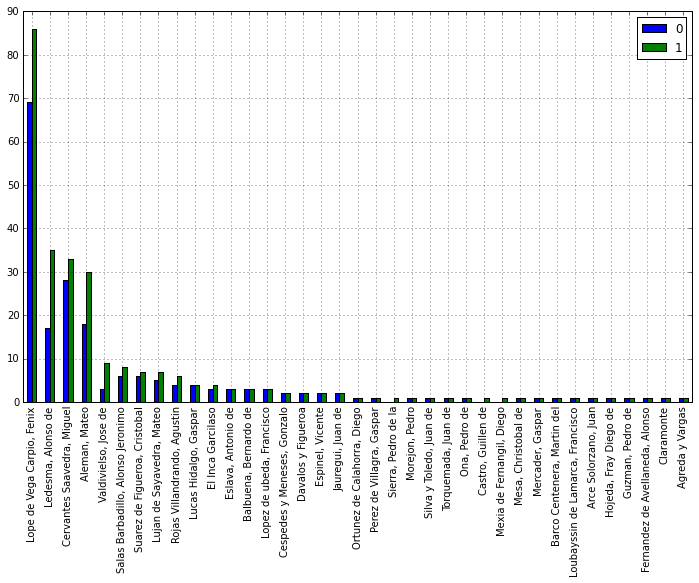

In [44]:
auths = pd.concat([samp_auths, pop_auths], axis=1).fillna(0)
auths = auths.sort(columns=1, ascending=False)
auths.plot(kind='bar')

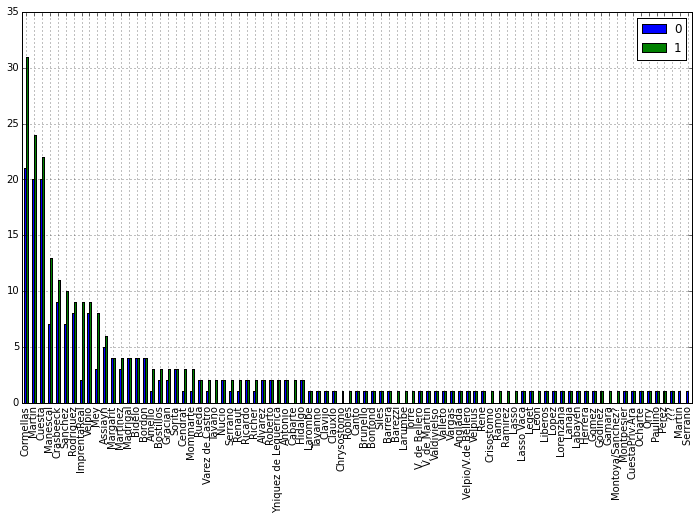

In [50]:
prints = pd.concat([samp_prints, pop_prints], axis=1).fillna(0)
prints = prints.sort(columns=1, ascending=False)
prints.plot(kind='bar')

In [51]:
chisquare(prints[0].values, prints[1].values)

(inf, nan)

In [52]:
chisquare(prints[0].values, prints[1].values)

(inf, nan)